In [5]:
import yaml
filename = f"data/telco-corr-test-0.25.yaml"

with open(filename, 'r') as file:
    data = yaml.safe_load(file)
# Initialize sets to store unique pi and delta factors
unique_pi_factors = set()
unique_delta_factors = set()

# Iterate over the data and extract unique pi and delta factors
for entry in data:
    if 'pi' in entry:
        unique_pi_factors.update(entry['pi'])
    if 'delta' in entry:
        unique_delta_factors.update(entry['delta'])

# Calculate the number of unique pi and delta factors
num_unique_pi_factors = len(unique_pi_factors)
num_unique_delta_factors = len(unique_delta_factors)

print("Number of unique pi factors:", num_unique_pi_factors)
print("Number of unique delta factors:", num_unique_delta_factors)

Number of unique pi factors: 10
Number of unique delta factors: 10


In [2]:
from briefcase.case import Case
from briefcase.case_base import CaseBase
import import_ipynb
import pandas as pd
import matplotlib.pyplot as plt
import TelcoConverter as TC

def get_existing_test_data(cluster="corr", test_split="0.25"):

    filename = f"data/telco-{cluster}-test-{test_split}.yaml"
    
    try:
        with open(filename, 'r') as file:
            data = yaml.safe_load(file)
        print(f"Loaded data successfully from '{filename}'")
    except FileNotFoundError:
        print(f"File '{filename}' not found.")
        print(f"Creating new file")
        data = TC.dataset_to_yaml(cluster, float(test_split))
    except Exception as e:
        print("An error occurred:", str(e))
        
    return data 

def test_inconsistency(data):
    cases = [Case.from_dict(c) for c in data]
    cb = CaseBase(cases)  # Todo this is really really slow, but do we care?
    return cb.metrics()


def generate_data_and_plot(cluster="corr"):
    percentage_test = [0.05, 0.25, 0.5, 0.75]
    inconsistency_counts = []
    test_sizes = []

    for param in percentage_test:
        test_data = get_existing_test_data(cluster, str(param))
        test_size, inconsistency_count = test_inconsistency(test_data)
        test_sizes.append(test_size)
        inconsistency_counts.append(inconsistency_count)

    # Create a DataFrame
    df = pd.DataFrame({
        'Number of entries in test data': test_sizes,
        'Inconsistency Count': inconsistency_counts
    })

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(df['Number of entries in test data'], df['Inconsistency Count'], marker='o', linestyle='-')
    plt.title(f'Test Inconsistency vs Size of test data for {cluster} clustering')
    plt.xlabel('Number of entries in test data')
    plt.ylabel('Inconsistency Count')
    plt.grid(True)
    plt.show()


### Random clustering
This does not technically depend on the size of the training data, since the training data is never used, but for comparability we will test it on the same splits

Loaded data successfully from 'data/telco-rand-test-0.05.yaml'
Number of cases:  352
Number of tainted cases:  278
Loaded data successfully from 'data/telco-rand-test-0.25.yaml'
Number of cases:  1760
Number of tainted cases:  885
Loaded data successfully from 'data/telco-rand-test-0.5.yaml'
Number of cases:  3521
Number of tainted cases:  1476
Loaded data successfully from 'data/telco-rand-test-0.75.yaml'
Number of cases:  5282
Number of tainted cases:  1979


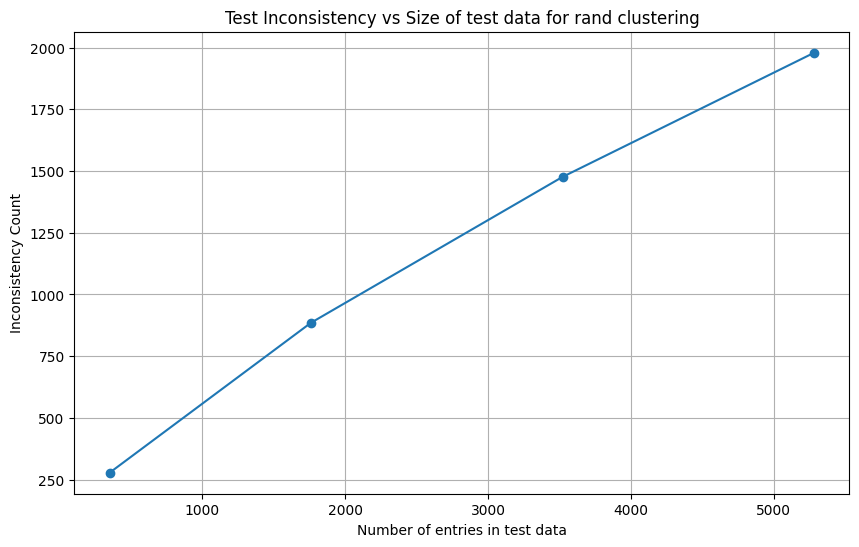

In [2]:
generate_data_and_plot("rand") # random seed = 42

Loaded data successfully from 'data/telco-rand_un-test-0.05.yaml'
Number of cases:  352
Number of tainted cases:  172
Loaded data successfully from 'data/telco-rand_un-test-0.25.yaml'
Number of cases:  1760
Number of tainted cases:  387
Loaded data successfully from 'data/telco-rand_un-test-0.5.yaml'
Number of cases:  3521
Number of tainted cases:  618
Loaded data successfully from 'data/telco-rand_un-test-0.75.yaml'
Number of cases:  5282
Number of tainted cases:  669


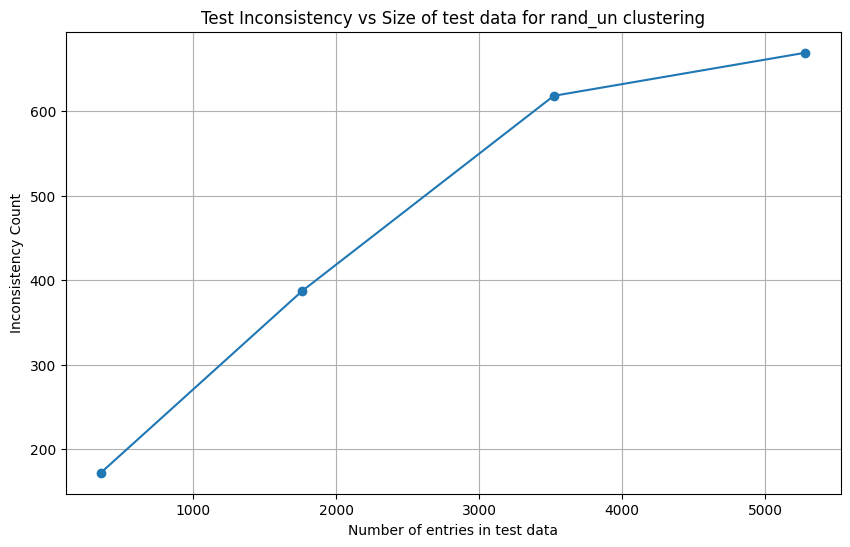

In [3]:
generate_data_and_plot("rand_un")


File 'data/telco-corr-test-0.05.yaml' not found.
Creating new file
Number of cases:  352
Number of tainted cases:  190
File 'data/telco-corr-test-0.25.yaml' not found.
Creating new file
Number of cases:  1760
Number of tainted cases:  469
File 'data/telco-corr-test-0.5.yaml' not found.
Creating new file
Number of cases:  3521
Number of tainted cases:  702
File 'data/telco-corr-test-0.75.yaml' not found.
Creating new file
Number of cases:  5282
Number of tainted cases:  615


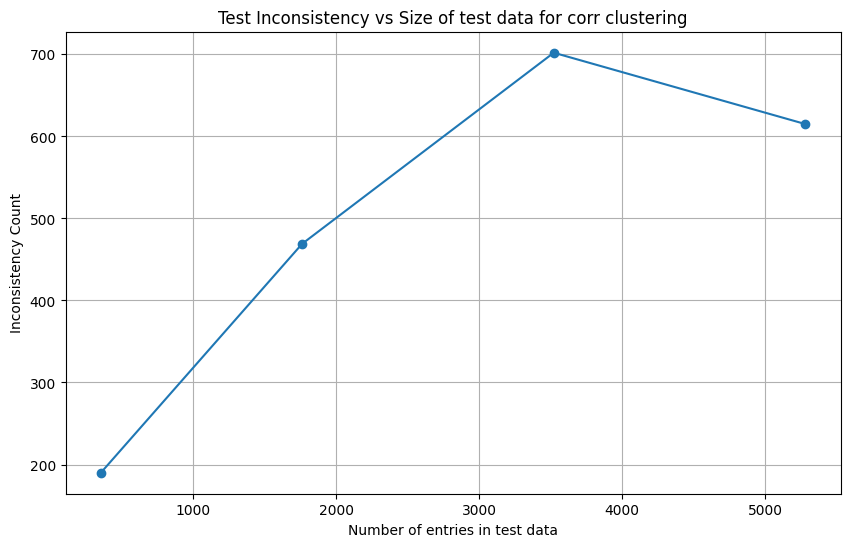

In [2]:
generate_data_and_plot("corr") # Todo - for some reason, this is a hell of a lot slower than the other two? 


Voting works really bad! Because there are way more cases with Churn than not Churn. The mechanism needs changing to account for this imbalance. But for now, we will just use correlations, since this works fine.

File 'data/telco-vote-test-0.05.yaml' not found.
Creating new file
{'Partner': 'delta', 'Dependents': 'delta', 'PhoneService': 'delta', 'PaperlessBilling': 'delta', 'Churn': 'pi', 'gender_Female': 'delta', 'gender_Male': 'delta', 'MultipleLines_No': 'delta', 'MultipleLines_No phone service': 'delta', 'MultipleLines_Yes': 'delta', 'InternetService_DSL': 'delta', 'InternetService_Fiber optic': 'delta', 'InternetService_No': 'delta', 'OnlineSecurity_False': 'delta', 'OnlineSecurity_True': 'delta', 'OnlineBackup_False': 'delta', 'OnlineBackup_True': 'delta', 'DeviceProtection_False': 'delta', 'DeviceProtection_True': 'delta', 'TechSupport_False': 'delta', 'TechSupport_True': 'delta', 'StreamingTV_False': 'delta', 'StreamingTV_True': 'delta', 'StreamingMovies_False': 'delta', 'StreamingMovies_True': 'delta', 'Contract_Month-to-month': 'delta', 'Contract_One year': 'delta', 'Contract_Two year': 'delta', 'PaymentMethod_Bank transfer (automatic)': 'delta', 'PaymentMethod_Credit card (automatic

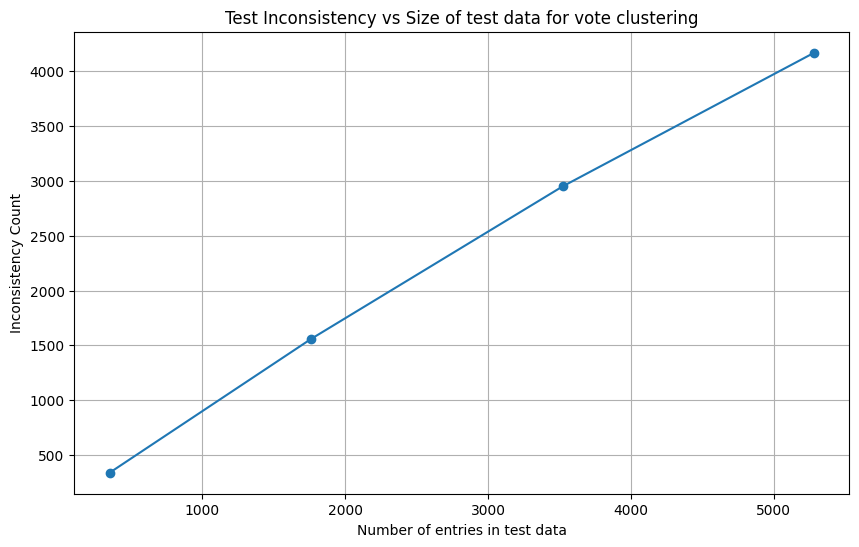

In [3]:
generate_data_and_plot("vote")
